In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data_car.csv')

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.shape

(11914, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [7]:
#Handling missing values
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [8]:
#Since Engine Fuel Type and Market Category are containing categorical values,the missing values in that columns can be replaced using mode values of respective columns.

In [9]:
#Filling the null values with respective mode values 
for i in ['Engine Fuel Type','Market Category']:
  df[i]=df[i].fillna(df[i].mode()[0])

In [10]:
df['Engine Fuel Type'].isna().sum()#checking for null values after filling with mode

0

In [11]:
df['Market Category'].isna().sum()#checking for null values after filling with mode

0

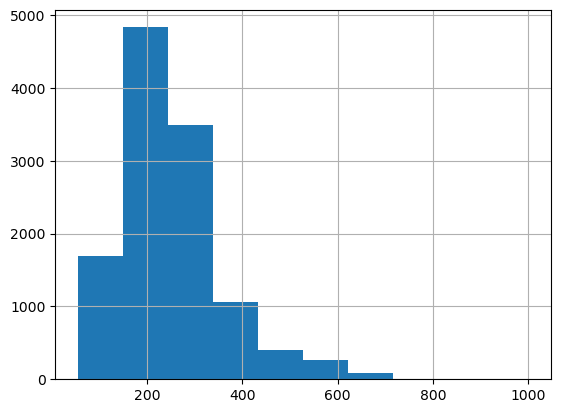

In [12]:
#Checking the distribution of data in Engine HP  column
df['Engine HP'].hist();

In [13]:
df['Engine HP'].fillna(df['Engine HP'].median(),inplace=True)#filling null values in Age column with respective median value

In [14]:
for col in ['Engine Cylinders', 'Number of Doors']:
    df[col]=df[col].fillna(df[col].median())

In [15]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [16]:
#Checking for Correlation
corr=df.corr()

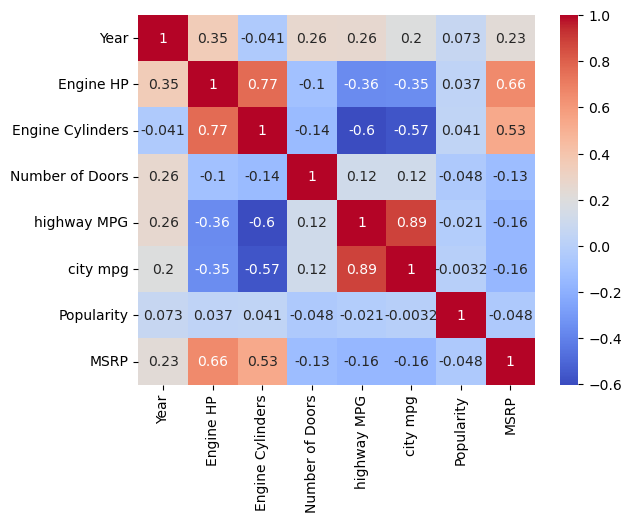

In [17]:
#plotting df.corr() using heatmap
sns.heatmap(corr,cmap='coolwarm',annot=True);

In [18]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Make']=le.fit_transform(df['Make'])
df['Model']=le.fit_transform(df['Model'])
df['Engine Fuel Type']=le.fit_transform(df['Engine Fuel Type'])
df['Transmission Type']=le.fit_transform(df['Transmission Type'])
df['Driven_Wheels']=le.fit_transform(df['Driven_Wheels'])
df['Market Category']=le.fit_transform(df['Market Category'])
df['Vehicle Size']=le.fit_transform(df['Vehicle Size'])
df['Vehicle Style']=le.fit_transform(df['Vehicle Style'])

# Linear Regression Model

In [20]:
x=df.drop(['MSRP'],axis=1)
y=df['MSRP']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
#splitting x and y values into training and testing data,test size taken is 25% and random state set to 42
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()#creating an instance of LinearRegression()
model=lr.fit(x_train,y_train)#creating the model using training data
y_pred=model.predict(x_test)#predicting values using the model created using training data
     

In [24]:
# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

Mean squared Error on test set :  2003168384.113681


In [25]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is:',mean_squared_error(y_test,y_pred))#MSE value
print('R sqaured value is:',r2_score(y_test,y_pred))#R2 score    

MSE is: 2003168384.1136844
R sqaured value is: 0.47333051124937187


# Lasso Regression

In [26]:
from sklearn.linear_model import Lasso

In [27]:
from sklearn.model_selection import train_test_split

#splitting x and y values into training and testing data,test size taken is 25% and random state set to 42
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [28]:
#alpha=0.1

ls=Lasso(alpha=0.1)
model=ls.fit(x_train,y_train)#creating the model using training data
y_pred=model.predict(x_test)#predicting values

In [29]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R sqaured value is:',r2_score(y_test,y_pred))

MSE is: 2003167938.983771
R sqaured value is: 0.47333062828214145


In [30]:
#alpha=1
ls=Lasso(alpha=1)
model=ls.fit(x_train,y_train)#creating the model using training data
y_pred=model.predict(x_test)#predicting values
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R sqaured value is:',r2_score(y_test,y_pred))

MSE is: 2003163941.7891672
R sqaured value is: 0.4733316792174773


# Ridge regression

In [31]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=50,max_iter=100,tol=0.1)
ridge_model=ridge.fit(x_train,y_train)
ridge_model

Ridge(alpha=50, max_iter=100, tol=0.1)

In [32]:
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R sqaured value is:',r2_score(y_test,y_pred))

MSE is: 2003163941.7891672
R sqaured value is: 0.4733316792174773
